In [26]:
# importing libraries for data loading and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [2]:
# loading up data sources for each model

# Political Bias
political_democrat_model_input = pd.read_csv('data/model_data/political_democrat_train.txt',
                                             sep='\t',
                                             header = None,
                                             names = ['sentence_text'])

political_republican_model_input = pd.read_csv('data/model_data/political_republican_train.txt',
                                             sep='\t',
                                             header = None,
                                             names = ['sentence_text'])
# Shakespeare
shakespeare_modern_model_input = pd.read_csv('../models/shakespeare/data/shakes_mod.train.0',
                                             sep='\t',
                                             header = None,
                                             names = ['sentence_text'])

shakespeare_original_model_input = pd.read_csv('../models/shakespeare/data/shakes_mod.train.1',
                                             sep='\t',
                                             header = None,
                                             names = ['sentence_text'])
# Trump-Teen
trump_model_input = pd.read_csv('data/model_data/twitter_trump_sentences.csv',
                                             sep='\t',
                                             header = None,
                                             names = ['sentence_text'])

teen_model_input = pd.read_csv('data/model_data/reddit_teenagers_filtered_sentences.csv',
                                             sep='\t',
                                             header = None,
                                             names = ['sentence_text'])

# Summarization
summary_normal_model_input = pd.read_csv('data/model_data/wiki_normal_matched_train.txt',
                                             sep='\t',
                                             header = None,
                                             names = ['sentence_text'])

summary_simple_model_input = pd.read_csv('data/model_data/wiki_simple_matched_train.txt',
                                             sep='\t',
                                             header = None,
                                             names = ['sentence_text'])

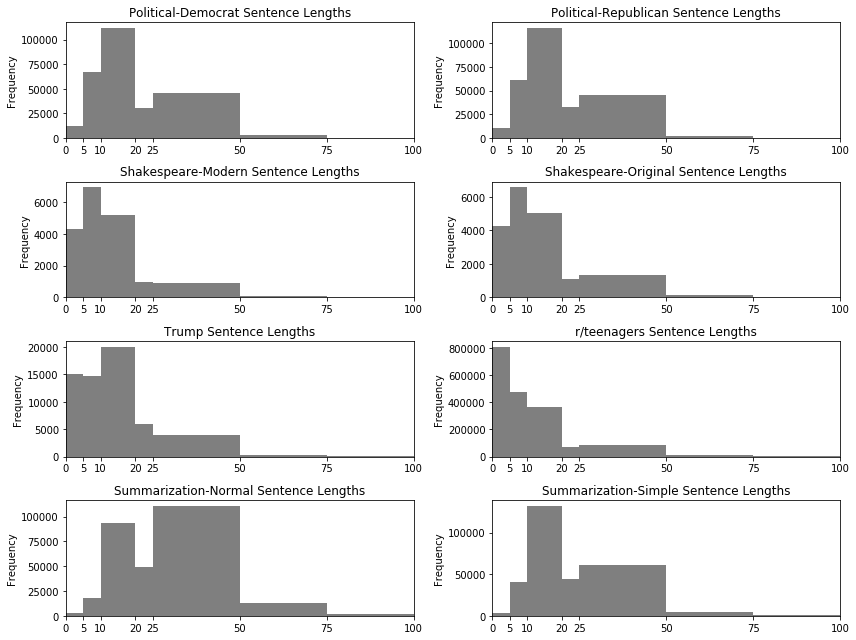

In [9]:
# Sentence length histograms by source

plt.figure(figsize=(12,9))

# Political Bias
plt.subplot(4, 2, 1)
political_democrat_model_input['sentence_text'].str.count(' ').plot.hist(color='k', 
                                                           alpha=0.5, 
                                                           bins=[0, 5, 10, 20, 25, 50, 75, 100], 
                                                           xlim = (0,100), 
                                                           xticks = [0, 5, 10, 20, 25, 50, 75, 100],
                                                           title = 'Political-Democrat Sentence Lengths'
                                                          )

plt.subplot(4, 2, 2)
political_republican_model_input['sentence_text'].str.count(' ').plot.hist(color='k', 
                                                           alpha=0.5, 
                                                           bins=[0, 5, 10, 20, 25, 50, 75, 100], 
                                                           xlim = (0,100), 
                                                           xticks = [0, 5, 10, 20, 25, 50, 75, 100],
                                                           title = 'Political-Republican Sentence Lengths'
                                                          )

# Shakespeare
plt.subplot(4, 2, 3)
shakespeare_modern_model_input['sentence_text'].str.count(' ').plot.hist(color='k', 
                                                           alpha=0.5, 
                                                           bins=[0, 5, 10, 20, 25, 50, 75, 100], 
                                                           xlim = (0,100), 
                                                           xticks = [0, 5, 10, 20, 25, 50, 75, 100],
                                                           title = 'Shakespeare-Modern Sentence Lengths'
                                                          )

plt.subplot(4, 2, 4)
shakespeare_original_model_input['sentence_text'].str.count(' ').plot.hist(color='k', 
                                                           alpha=0.5, 
                                                           bins=[0, 5, 10, 20, 25, 50, 75, 100], 
                                                           xlim = (0,100), 
                                                           xticks = [0, 5, 10, 20, 25, 50, 75, 100],
                                                           title = 'Shakespeare-Original Sentence Lengths'
                                                          )

# Trump-Teen
plt.subplot(4, 2, 5)
trump_model_input['sentence_text'].str.count(' ').plot.hist(color='k', 
                                                           alpha=0.5, 
                                                           bins=[0, 5, 10, 20, 25, 50, 75, 100], 
                                                           xlim = (0,100), 
                                                           xticks = [0, 5, 10, 20, 25, 50, 75, 100],
                                                           title = 'Trump Sentence Lengths'
                                                          )

plt.subplot(4, 2, 6)
teen_model_input['sentence_text'].str.count(' ').plot.hist(color='k', 
                                                           alpha=0.5, 
                                                           bins=[0, 5, 10, 20, 25, 50, 75, 100], 
                                                           xlim = (0,100), 
                                                           xticks = [0, 5, 10, 20, 25, 50, 75, 100],
                                                           title = 'r/teenagers Sentence Lengths'
                                                          )

# Summarization
plt.subplot(4, 2, 7)
summary_normal_model_input['sentence_text'].str.count(' ').plot.hist(color='k', 
                                                           alpha=0.5, 
                                                           bins=[0, 5, 10, 20, 25, 50, 75, 100], 
                                                           xlim = (0,100), 
                                                           xticks = [0, 5, 10, 20, 25, 50, 75, 100],
                                                           title = 'Summarization-Normal Sentence Lengths'
                                                          )

plt.subplot(4, 2, 8)
summary_simple_model_input['sentence_text'].str.count(' ').plot.hist(color='k', 
                                                           alpha=0.5, 
                                                           bins=[0, 5, 10, 20, 25, 50, 75, 100], 
                                                           xlim = (0,100), 
                                                           xticks = [0, 5, 10, 20, 25, 50, 75, 100],
                                                           title = 'Summarization-Simple Sentence Lengths'
                                                          )

plt.tight_layout()
plt.savefig('../results/histograms.png', bbox_inches='tight')
plt.show()

In [25]:
# Function for word frequencies and outputting top words

def common_words(data):
    
    clean_data = []
    
    # Setting up stop words
    default_stopwords = set(nltk.corpus.stopwords.words('english'))
    custom_stopwords = set((u'democratic',
                            u'republican',
                            u'dg',
                            u'``',
                            u'dgdg',
                            u"'s",
                            u"n't",
                            u"'ll",
                            u"'m",
                            u"'re",
                            u"'ve",
                            u'amp',
                            u'--',
                            u'��',
                            u'https',
                            u'http',
                            u'dgdgdg'))
    
    all_stopwords = default_stopwords | custom_stopwords
    
    # Tokenizing text and flattening to single list of tokens
    for i in data:
        clean_data.append(nltk.word_tokenize(i))
    
    clean_data = [item for sublist in clean_data for item in sublist]
        
    # Remove single-character tokens (mostly punctuation)
    clean_data = [word for word in clean_data if len(word) > 1]

    # Remove numbers
    clean_data = [word for word in clean_data if not word.isnumeric()]

    # Lowercase all words (default_stopwords are lowercase too)
    clean_data = [word.lower() for word in clean_data]

    # Remove stopwords
    clean_data = [word for word in clean_data if word not in all_stopwords]
    
    # Calculate frequency distribution
    fdist = nltk.FreqDist(clean_data)

    # Output top 25 most common words
    top_words = []

    for word, frequency in fdist.most_common(25):
        top_words.append((word, frequency))
    
    return top_words

# Calculating word frequencies and outputting top words

political_democrat_top_words = common_words(political_democrat_model_input['sentence_text'])
political_republican_top_words = common_words(political_republican_model_input['sentence_text'])

shakespeare_modern_top_words = common_words(shakespeare_modern_model_input['sentence_text'])
shakespeare_original_top_words = common_words(shakespeare_original_model_input['sentence_text'])

trump_top_words = common_words(trump_model_input['sentence_text'])
teen_top_words = common_words(teen_model_input['sentence_text'].dropna())

summary_normal_top_words = common_words(summary_normal_model_input['sentence_text'])
summary_simple_top_words = common_words(summary_simple_model_input['sentence_text'])

# Printing results

print("Most common words from Political-Democratic model data: ")
for i in political_democrat_top_words:
    print(i)
    
print("Most common words from Political-Republican model data: ")
for i in political_republican_top_words:
    print(i)
    
print("Most common words from Shakespeare-Modern model data: ")
for i in shakespeare_modern_top_words:
    print(i)
    
print("Most common words from Shakespeare-Original model data: ")
for i in shakespeare_original_top_words:
    print(i)
    
print("Most common words from Trump model data: ")
for i in trump_top_words:
    print(i)
    
print("Most common words from Teen model data: ")
for i in teen_top_words:
    print(i)
    
print("Most common words from Summarization-Normal model data: ")
for i in summary_normal_top_words:
    print(i)
    
print("Most common words from Summarization-Simple model data: ")
for i in summary_simple_top_words:
    print(i)

Most common words from Political-Democratic model data: 
('senator', 24021)
('thank', 23625)
('trump', 17580)
('warren', 16410)
('people', 15511)
('bernie', 14197)
('elizabeth', 12416)
('us', 12245)
('please', 11414)
('vote', 11063)
('like', 10127)
('hillary', 9701)
('dgdgdgdg', 9422)
('sanders', 8845)
('would', 8697)
('work', 8334)
('get', 8326)
('amy', 8313)
('need', 8192)
('support', 7446)
('one', 7351)
('women', 7183)
('president', 7162)
('good', 6652)
('right', 6402)
Most common words from Political-Republican model data: 
('obama', 26847)
('people', 16245)
('get', 13457)
('would', 12855)
('vote', 12780)
('president', 11913)
('like', 11802)
('us', 11278)
('government', 10509)
('country', 10300)
('mr', 10234)
('paul', 10155)
('need', 9936)
('congress', 9814)
('rand', 9058)
('obamacare', 8369)
('senator', 8205)
('constitution', 7996)
('time', 7916)
('one', 7915)
('tax', 7702)
('mccain', 7553)
('god', 7271)
('stop', 7255)
('please', 7012)
Most common words from Shakespeare-Modern mod